In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

### Ripley K-Function

$$ \mathcal{D}_K(h | d_{ij}) = \frac{A}{N^2} \sum_i\sum_{i \neq j} \frac{I(d_{ij}\leq h)}{\omega(l_i,l_j)}$$

Ripley's K- function can also be compared with the theoretical model od a random Poisson-distribution of points given by:

$$ \mathcal{D}_{K}(h | d_{ij} \in \mathcal{P} ) = \pi h^2$$

However, this allows for the definition of the simple loss function (error function):


$$\mathcal{L}(h) = \sqrt{\frac{\mathcal{D}_K(h | d_{ij})}{\pi}} - h  $$



In [55]:
def ripley_k(data_points, h):
    """
    Compute Ripley's K-function for a given set of data points.

    Parameters:
        data_points (ndarray): 2D array of shape (n, 2) containing (x, y) coordinates of data points.
        h (ndarray): Array of distances for which to compute Ripley's K-function D(k).

    Returns:
        k_values (ndarray): Array of K-function values corresponding to each radius.
    """
    n = len(data_points)
    distances = squareform(pdist(data_points))

    k_values = np.zeros_like(h)

    for i, r in enumerate(h):
        count = np.sum(distances <= r, axis=1) - 1  # Exclude the point itself
        k_values[i] = np.mean(count) / n

    return k_values


In [68]:
# Generate random points within a square region
np.random.seed(0)
n_points = 1000
data_points = np.random.rand(n_points, 2) * 100  # Random points within [0, 10] x [0, 10] region

# Define radii for Ripley's K-function
r_max = 10
dr = 0.1
h = np.arange(0, r_max, dr)


In [69]:
# Compute Ripley's K-function
k_values = ripley_k(data_points, h)



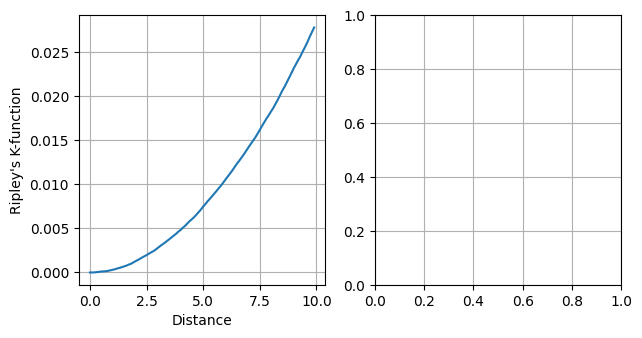

In [73]:

fig, axs = plt.subplots(1,2,figsize = (2*3.5,3.5))

axs = np.array(axs).flatten()
# Plot Ripley's K-function
axs[0].plot(h, k_values, label="Ripley's K-function")
# plt.plot(h,np.pi*h**2)



axs[0].set_xlabel('Distance')
axs[0].set_ylabel('Ripley\'s K-function')

for ax in axs: ax.grid()


